In [62]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in the data
df= pd.read_csv('/Users/sachinsajith/Documents/Porfolio/Correlation Python/movies.csv')

In [63]:
#Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [64]:
# Chekcing for missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull()) 
    print(f"{col}-{percent_missing:.2f} %")

name-0.00 %
rating-0.01 %
genre-0.00 %
year-0.00 %
released-0.00 %
score-0.00 %
votes-0.00 %
director-0.00 %
writer-0.00 %
star-0.00 %
country-0.00 %
budget-0.28 %
gross-0.02 %
company-0.00 %
runtime-0.00 %


In [65]:
# Checking data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<Axes: >

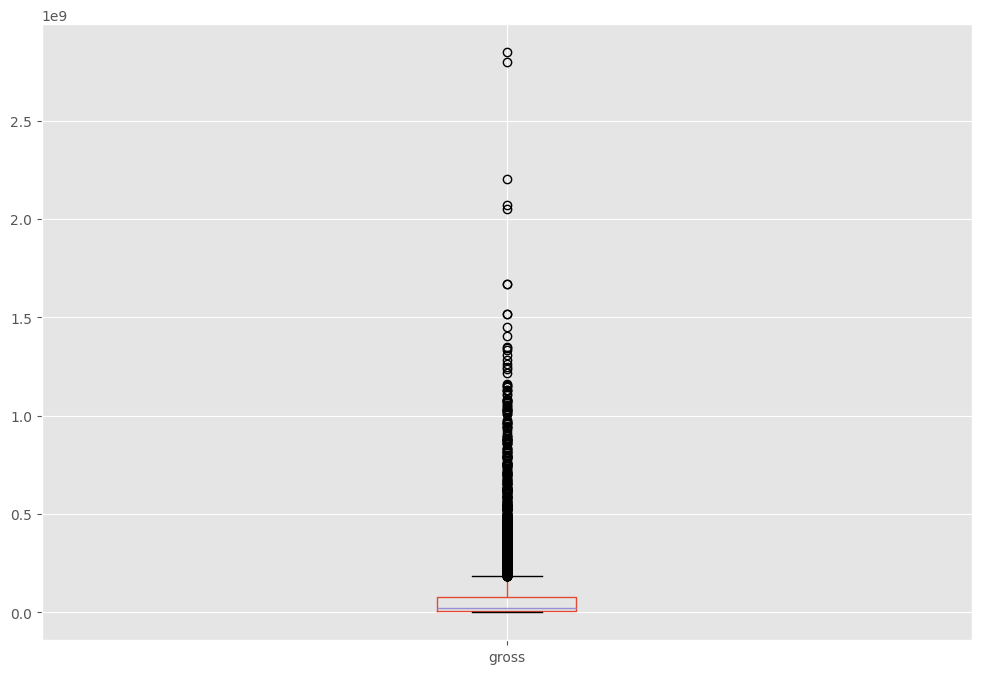

In [66]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [67]:
# Drop rows with NaN values
df.dropna(subset=['budget', 'gross', 'votes'], inplace=True)

# Convert columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [68]:
#Create correct year column
df['corrected_year'] = df['released'].astype(str).str[-20:-15]

In [69]:
df = df.sort_values(by = 'gross', inplace = False, ascending = False)
pd.set_option('display.max_rows',None)

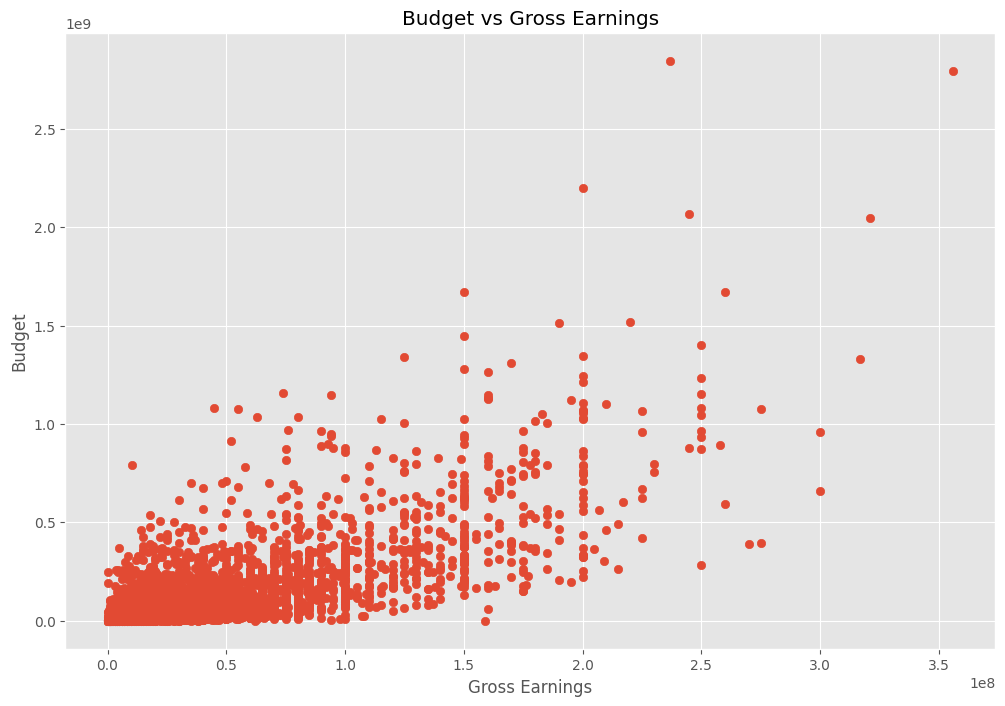

In [70]:
# Scatter Plot for Budget vs Gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

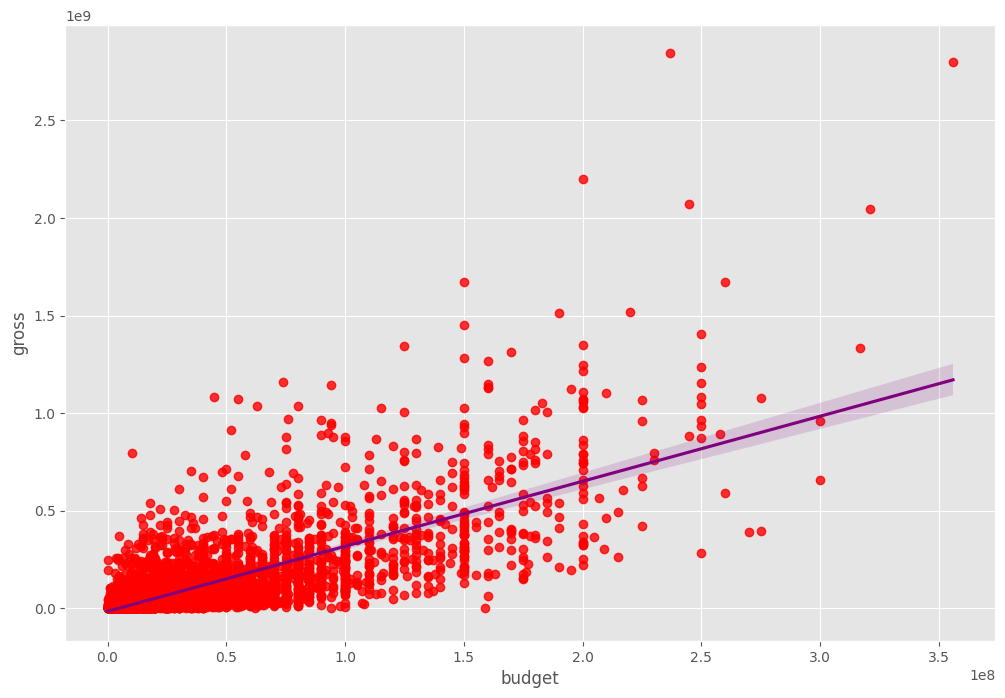

In [71]:
# Scatter Plot for Budget vs GrossScatter with a Regression Line
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'},line_kws={'color':'purple'})

In [72]:
# Looking at correlation
df.corr(method = 'pearson',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [73]:
# High correlation between Budget and Gross


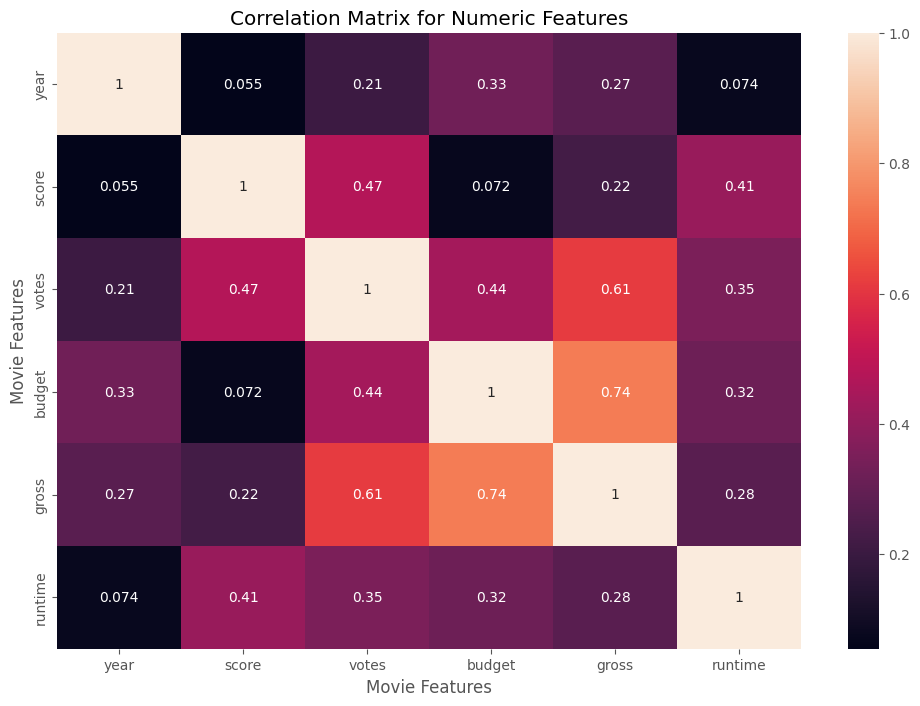

In [74]:
# Constructing a correlation matrix
correlation_matrix = df.corr(method = 'pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [75]:
# Looking at companies
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [76]:
# Convert categorical variables to numeric codes
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,387,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,69
7445,389,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,79
3045,4923,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,56
6663,3656,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,75
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,78


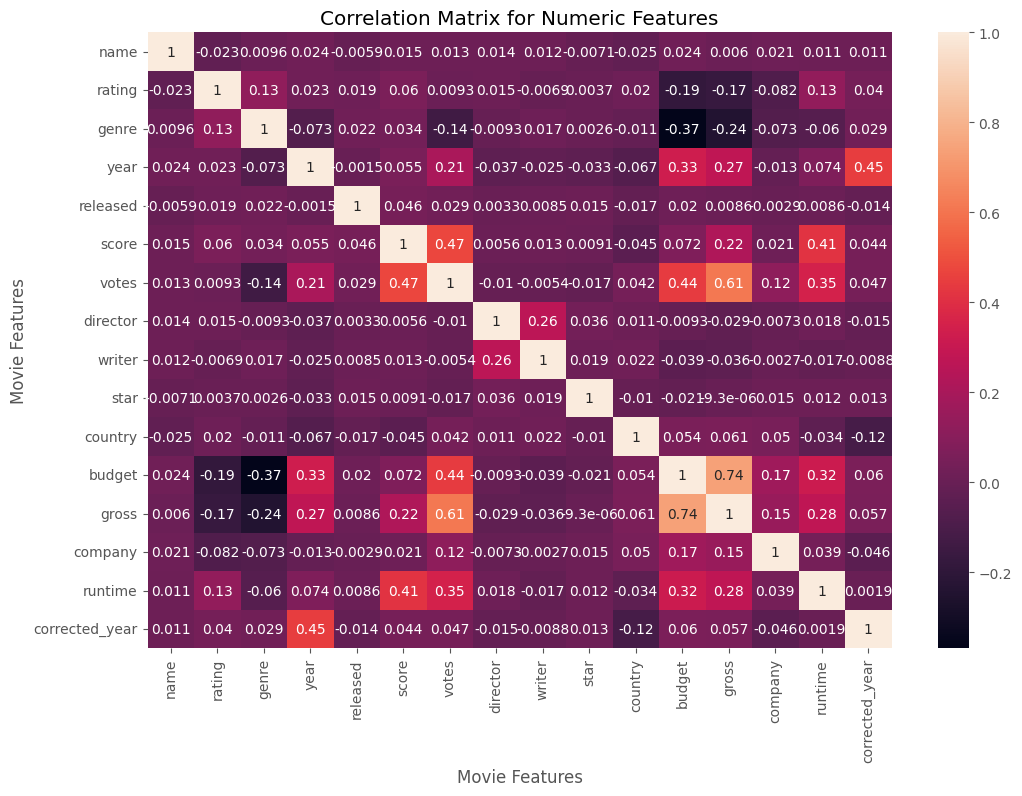

In [77]:
correlation_matrix = df_numerized.corr(method = 'pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [78]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.023013
      genre       0.009617
      year        0.024435
      released   -0.005896
dtype: float64

In [79]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368900
genre   budget   -0.368900
        gross    -0.244380
gross   genre    -0.244380
budget  rating   -0.186892
dtype: float64

In [80]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr.head()

gross   votes     0.614904
votes   gross     0.614904
gross   budget    0.740395
budget  gross     0.740395
name    name      1.000000
dtype: float64

In [81]:
# Conclusions
# Votes and Budget have highest correlation to gross earnings.
# While the company which produced the movie does not have a high correlation as anticipated (by me).